# Imports and Installations

In [20]:
pip install adversarial-robustness-toolbox

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from Data_Preprocessing import Data_Preprocessor
from Data_Cleaning import Data_Cleaner
from randomforestattack import RandomForestAttack


# Data Cleaning

In [10]:
df = Data_Cleaner('heloc_dataset.csv').df
Data_Cleaner('heloc_dataset.csv').output_to_csv('test1.csv')
df

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,DeragatoryComment,120Delinquent,90Delinquent,60Delinquent,30Delinquent,UnkownDelinquency,NeverDelinquent
0,0.0,55.0,144.0,4.0,84.0,20.0,3.0,0.0,83.0,2.000000,...,1.000000,1.000000,69.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,61.0,58.0,15.0,41.0,2.0,4.0,4.0,100.0,10.717713,...,1.046141,0.038362,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,67.0,66.0,5.0,24.0,9.0,0.0,0.0,100.0,29.036863,...,2.000000,1.000000,86.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,66.0,169.0,1.0,73.0,28.0,1.0,1.0,93.0,76.000000,...,4.000000,3.000000,91.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,81.0,333.0,27.0,132.0,12.0,0.0,0.0,100.0,35.910290,...,1.000000,0.000000,80.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10454,1.0,73.0,131.0,5.0,57.0,21.0,0.0,0.0,95.0,80.000000,...,2.000000,0.000000,100.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10455,0.0,65.0,147.0,39.0,68.0,11.0,0.0,0.0,92.0,28.000000,...,2.000000,1.000000,80.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10456,0.0,74.0,129.0,6.0,64.0,18.0,1.0,1.0,100.0,35.799977,...,1.920574,0.000000,56.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10457,0.0,72.0,234.0,12.0,113.0,42.0,2.0,2.0,96.0,35.000000,...,1.000000,0.000000,38.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Exploratory Data Analysis

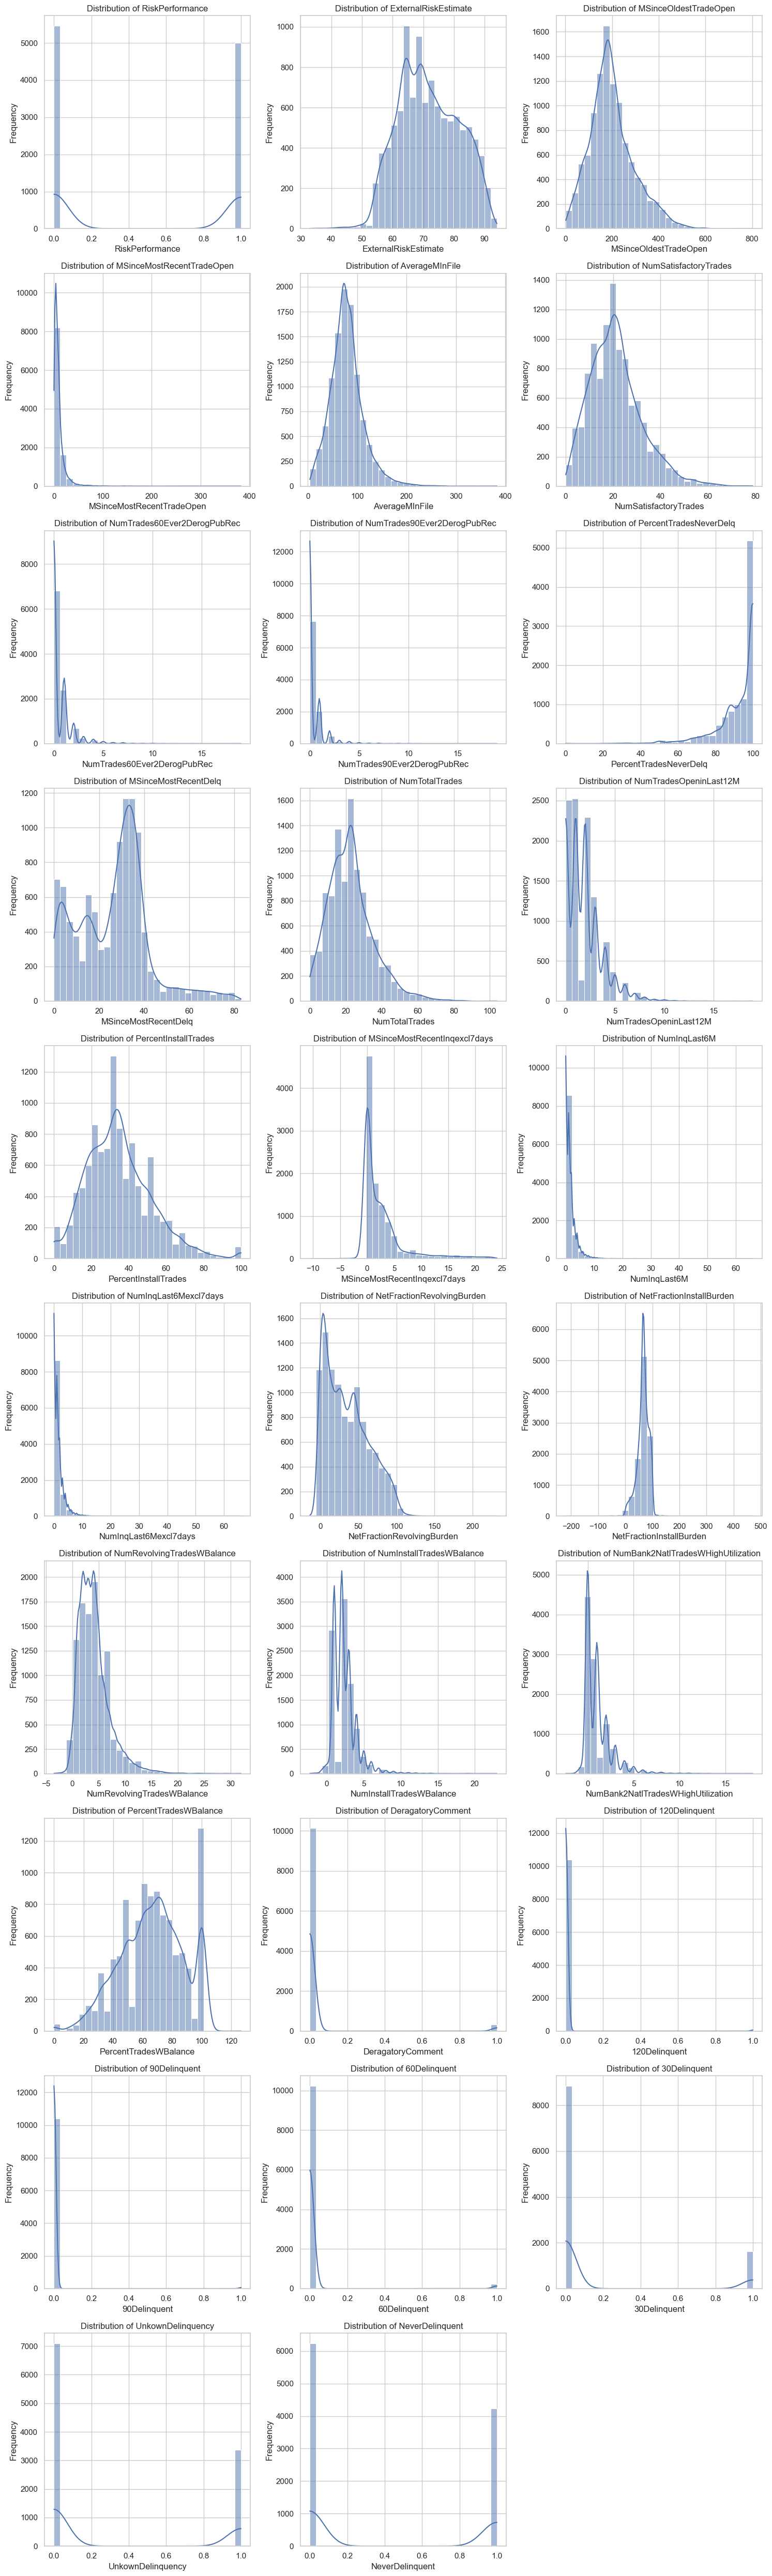

In [5]:
sns.set(style="whitegrid")

# Define the number of subplots
num_columns = len(df.select_dtypes(include=['float64', 'int64']).columns)
num_rows = (num_columns // 3) + (num_columns % 3 > 0)  # Calculate number of rows needed

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

# Plotting the distribution for each numerical column
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    sns.histplot(df[column], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots if the number of columns is not a multiple of 3
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

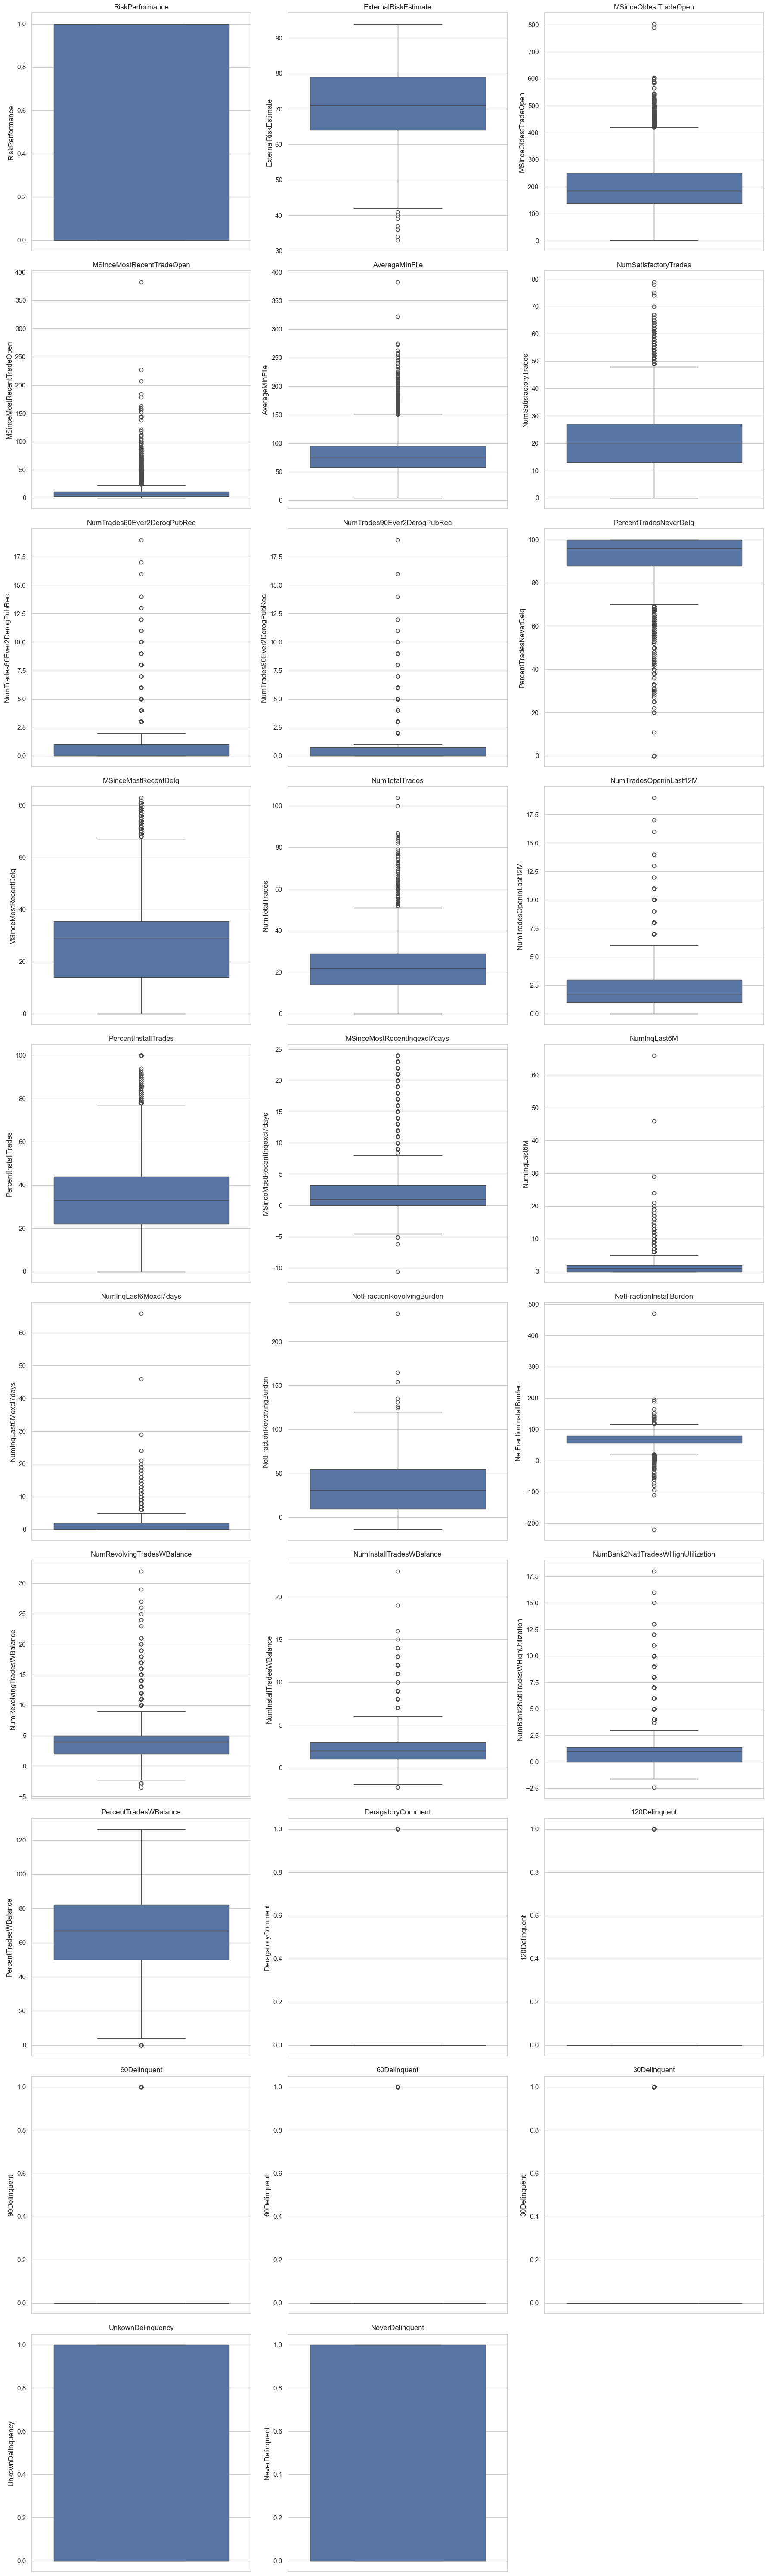

In [6]:
# Set the number of plots per row
plots_per_row = 3

# Calculate the number of rows needed based on the number of columns
num_rows = (len(df.columns) + plots_per_row - 1) // plots_per_row

# Create a figure with subplots
plt.figure(figsize=(18, 6 * num_rows))  # Adjust the height based on the number of rows

# Loop through the columns and create box plots
for i, column in enumerate(df.columns):
    plt.subplot(num_rows, plots_per_row, i + 1)  # Create a subplot for each column
    sns.boxplot(data=df[column])  # Create the box plot
    plt.title(column)  # Set the title as the column name

# Adjust layout
plt.tight_layout()
plt.show()  # Display all plots

# Data Preprocessing

In [12]:
df = Data_Preprocessor('test1.csv').df
df

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,DeragatoryComment,120Delinquent,90Delinquent,60Delinquent,30Delinquent,UnkownDelinquency,NeverDelinquent
2,0.0,67.0,66.0,1.791759,24.0,9.0,0.0,0.0,4.615121,29.036863,...,2.0,1.0,86.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,81.0,333.0,1.945910,132.0,12.0,0.0,0.0,4.615121,35.910290,...,1.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,1.0,68.0,148.0,2.079442,65.0,17.0,0.0,0.0,4.430817,31.000000,...,2.0,2.0,40.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,61.0,79.0,1.609438,36.0,19.0,0.0,0.0,4.564348,5.000000,...,3.0,1.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1.0,82.0,96.0,1.791759,47.0,16.0,0.0,0.0,4.615121,36.186508,...,2.0,0.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10451,1.0,79.0,133.0,1.098612,68.0,27.0,0.0,0.0,4.615121,32.449570,...,2.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10452,1.0,90.0,197.0,1.791759,92.0,13.0,0.0,0.0,4.615121,40.206378,...,3.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10454,1.0,73.0,131.0,1.791759,57.0,21.0,0.0,0.0,4.564348,31.635207,...,2.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10455,0.0,65.0,147.0,1.945910,68.0,11.0,0.0,0.0,4.532599,28.000000,...,2.0,1.0,80.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Model Evaluation

In [14]:
y = df['RiskPerformance']
X = df.drop(columns=['RiskPerformance'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
auc_benign = roc_auc
print(roc_auc)

0.8290516441100306


# Attack Implementation

In [24]:
RA = RandomForestAttack(classifier=model)

In [36]:
X_test_adv = RA.generate(X_test.to_numpy())


In [37]:
#model.fit(X_train_adv, y_train)
y_adv_pred_proba = model.predict_proba(X_test_adv)[:, 1]

In [38]:
succ_rate = round((1 - roc_auc_score(y_test, y_adv_pred_proba)), 4)*100
print(f'attack success rate {succ_rate}%')


attack success rate 22.759999999999998%
